# Lab Five - Health Impacts

## *Normal Distributions of Temperature Data & Boxplots of Extremes*

In this lab we will learn how to evaluate histograms and geographically located climate data.  

You will learn how to: 

- Plot and evaluate histogram data.
- Plot boxplot data.
- Evaluate & create normal distributions. 
- Analyze multi-indexed data.
- Annotate figures. 
- Use groupby to group data and analyze.

By the end of this lab you should be able to: plot, and evaluate (quantitatively and qualitatively) normal distributions.

Additional materials for reading: 
- Plotting example - https://matplotlib.org/gallery/statistics/boxplot_demo.html
- Scientific Source Materials & Inspirations:
    - [National Climate Assesment](https://nca2014.globalchange.gov/highlights/report-findings/human-health)
    - [Hansen, Sato & Reto Ruedy. Perception of climate change. PNAS 2012 September, 109 (37) E2415-E2423.](https://doi.org/10.1073/pnas.1205276109)
- Artistic Inspiration: 
    - https://www.nytimes.com/interactive/2017/07/28/climate/more-frequent-extreme-summer-heat.html?smid=pl-share
            


## *Tips on Submitting Files for Lab Assignments*


On Lab 3 we had you submit all your data files with your notebook. The reason for this is that you are picking and choosing most of your own data to analyze in preparation for the project. To evaluate if your code is working we need your data files, submitted in the file structure that YOU are using. The best way to do this is to zip up your folder that you have within such as: 
- notebook, 
- data files in the correct file structure that you used and programmed, and 
- external files with functions. 

**Your goal should be that the grader can download the zipped up folder that you submit and for the notebook to run without any missing files, just like you download these exact labs!**

You can test if your assignment works as expected by downloading your submitted Canvas zipped folder and trying it yourself. 


----

## *Note - Additional Resource* 

There is an FAQ section on the online labs for this class. It's being updated as we speak - I will be putting little tips and tricks there as the course keeps going that you might find helpful. See the link [here](https://github.com/astro-abby/data_vis_statistics_geosciences/blob/master/FAQ/FAQ.md).

----

## *Let's Gain Some Inspiration For This Lab - *

The data we are using here is a combination of the overall trends in temperature with the number of extreme heat days within the summer. Let's start off by looking at the following [interactive graphic](https://www.nytimes.com/interactive/2017/07/28/climate/more-frequent-extreme-summer-heat.html?smid=pl-share). Compare this to the original source material from [Hansen, Sato & Reto Ruedy. Perception of climate change. PNAS 2012 September, 109 (37) E2415-E2423.](https://doi.org/10.1073/pnas.1205276109).


Spend a minute looking at the interactive graphic. **How does the presentation of this graphic differ from the source article?** Use the visualization lecture key topics we learned about last Monday. 

- Compose

- Abstract

- Color
 
- Layer

- Refine




----

## *Part 1 - Evaluating Potential Normal Distributions - Skew & Kurtosis*

We previously looked at the temperature distribution as a bar chart. In general temperatures, should be distributed in a normal distribution, centered around some average value with extremes forming rare events and the tails of these distribution. 

Our question in this lab, is how this distribution is changing with time for the lower 48 states in the summer months. 

We would like to set up a base time period to evaluate our changes . This base period should be very much like a normal distribution. In this part of the lab we will use the skew and kurtosis metrics we learned about in lecture to find an appropiate base period. 

**GOAL: Use skew and kurtosis to quantatively determine a "most normal distributed" period to use to then calculate the t (sometimes known as the z-values). These are the anomalies we reviewed in Lab 1 (see slide 21 Lecture 5).**

$$ t_{values} = \frac{x - \bar{x}}{\sigma}$$


### Part 1. A. - Evaluating the functions skew and kurtosis


In [1]:
#importing required packages

import matplotlib.pyplot as plt #for plotting 
import pandas as pd             #for analyzing data
import numpy as np              #for numpy mean & accuracy
import datetime as dt           #for datetime objects

from scipy.stats import skew, kurtosis, norm 
                                #NEW IN THIS LAB - scipy is another
                                #science module for analyzing data
        
#for plotting in notebook
%matplotlib inline

Let's see what the skew and kurtosis commands do. Use the help() function to ask skew and kurtosis how to use them. Read the description of both. 

**In Scipy Stats what do skew and kurtosis output as their values for a completly normal distribution?**

In [2]:
#Enter help commands below



-

-

-

-

-

-

-

-

-

Similar to most things in Python, there are several ways to accomplish the same functionality. Not only is there skew *function* in scipy.stats but it's ALSO a *method* of dataframe (and series) objects.





In [3]:
help(pd.DataFrame.skew)

help(pd.DataFrame.kurt)

Help on function skew in module pandas.core.frame:

skew(self, axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
    Return unbiased skew over requested axis
    Normalized by N-1
    
    Parameters
    ----------
    axis : {index (0), columns (1)}
    skipna : boolean, default True
        Exclude NA/null values. If an entire row/column is NA or empty, the result
        will be NA
    level : int or level name, default None
        If the axis is a MultiIndex (hierarchical), count along a
        particular level, collapsing into a Series
    numeric_only : boolean, default None
        Include only float, int, boolean columns. If None, will attempt to use
        everything, then use only numeric data. Not implemented for Series.
    
    Returns
    -------
    skew : Series or DataFrame (if level specified)

Help on function kurt in module pandas.core.frame:

kurt(self, axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
    Return unbiased kurtosis o

### Part 1. B. Reading in Temperature Data - 

We are reading in the temperature data again, converting the index to a datetime format for easier indexing.

In [4]:
#This data is from the NOAA site located at 
#https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/ytd/12/1880-2017
#This csv contains the average and anomalies for the last century
#in Farenheit and calculated against the 1901-2000 base period

temperVarUS = pd.read_csv('./Data/US_Temps/USAvrgTemp_ByMonth.txt', header = 4)
temperVarUS.index   = pd.to_datetime(temperVarUS['Date'], infer_datetime_format = False, 
                                  format = '%Y%m')


In [5]:
#make sure this imported correctly - use print, check the length, .head() etc

#ENTER COMMAND BELOW







### Part 1. C. Reviewing the Original Date Period for Normalizing (1901-2000)

The original dataset we downloaded normalized the calcualted anomalies to the century average or 1901-2000. What does this look like in the summer?

In [6]:
#set up date indexing 
startDate = dt.datetime(1901, 1, 1)
endDate   = dt.datetime(2000, 1, 1)


#May, June, June, July, August, September

#NOTE count the parenthesis around the or conditions - see how you
#have to double it? 
indSummer = ((temperVarUS.index >= startDate) & (temperVarUS.index <= endDate) & 
              (temperVarUS.index.month >= 5) & (temperVarUS.index.month <= 9))


#let's make sure this indexed the correct months - 
print(temperVarUS.loc[indSummer, 'Value'].head(n=10))

Date
1901-05-01    61.18
1901-06-01    68.43
1901-07-01    76.24
1901-08-01    73.20
1901-09-01    63.25
1902-05-01    61.99
1902-06-01    68.04
1902-07-01    72.05
1902-08-01    71.37
1902-09-01    62.76
Name: Value, dtype: float64


**Let's take a small pause here and discuss what this index did. What questions do you have about this index?**




-

-

-

-

Now let's see what these values look like - are they normally distributed? To answer that let's make a histogram. 






In [7]:
#First let's calculate the number of bins for our dataset - remember in class our loose rule is the minimum is around 
#the squaretoot of the sample size

sampleSize = len(temperVarUS.loc[indSummer, :])


numBins = np.ceil(np.sqrt(sampleSize))

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum
print("The number of bins for the histogram is: {}".format(numBins))

The number of bins for the histogram is: 23.0


### And now let's look at the data as a histogram.

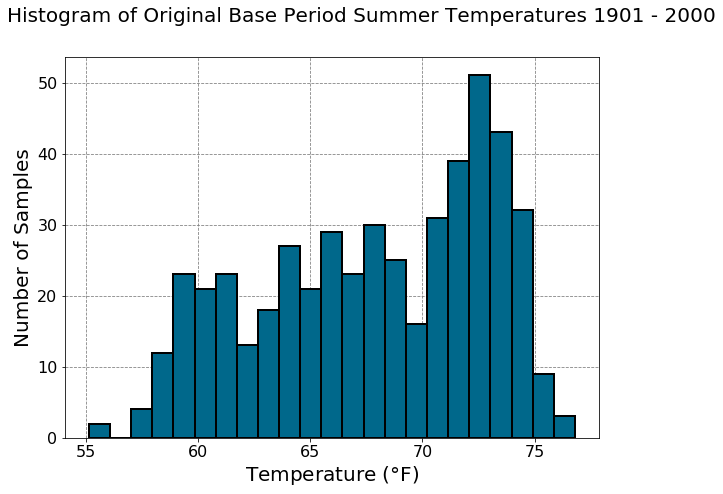

In [8]:

#set up the figure 
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Histogram of Original Base Period Summer Temperatures' + 
             ' {:%Y} - {:%Y}'.format(startDate, endDate), 
             fontsize=20)

gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#values is first entry, followed by number of bins, density is the
#normalization factor, ie normalize to 1. 

#edgecolor and linewidth set up the bin edges
#zorder is used for setting up what goes on top of what. Here I want
#the histogram to be plotted ABOVE the grid. 
ax1.hist(temperVarUS.loc[indSummer, 'Value'], bins = int(numBins), facecolor = '#00688b', 
         edgecolor="k", linewidth = 2.0, zorder = 10)

#bins keyword if passed an integer calculates a set of 
#intervals of the integer + 1 edges of equal size.

#set up grid, again zorder sets the location of the dashed grid below the 
#histogram
plt.grid(color='gray', linestyle='dashed', zorder = 0)

#labels
plt.xlabel('Temperature ($\degree$F)', fontsize = 20)
plt.ylabel('Number of Samples', fontsize = 20)
#large ticks
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16); #make the yaxis labels larger, the semicolon surpresses the Jupyter output


This is the histogram of summer temperatures (May - September) within the base period - **does this look like a normal distribution? Why not?**

Remember we want to calculate the anomalies as normlized to the base values. 

Sidenote - in your lab 3 assignment you are NOT using this ax.hist() command, rather you are taking the built in method of the DataFrame to get a histogram.

### Part 1. C. Looking at the Kurtosis & Skew for New Base Period

What is the kurtosis and the skew of the distribution above? Does this confirm what we see?

In [9]:
print("Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(temperVarUS.loc[indSummer, 'Value']), 
        kurtosis(temperVarUS.loc[indSummer, 'Value'], fisher = False), 
        np.std(temperVarUS.loc[indSummer, 'Value'], ddof = 1), 
        np.mean(temperVarUS.loc[indSummer, 'Value'])))

#within this print statement we are using format codes
#to print out the format with improved readability. 

#see this for more information - https://docs.python.org/3/library/string.html#string-formatting

Skew: -0.4, Kurtosis: 1.9, Standard Dev: 5.1, Mean: 67.8


### Does this improve with just a singular month?


In [10]:
#set up date indexing 
startDate = dt.datetime(1901, 1, 1)
endDate   = dt.datetime(2000, 1, 1)


#just June
indMonth = ((temperVarUS.index >= startDate) & (temperVarUS.index <= endDate) & 
            (temperVarUS.index.month == 6))


#let's make sure this indexed the correct months - 
print(temperVarUS.loc[indMonth, 'Value'].head(n=10))

Date
1901-06-01    68.43
1902-06-01    68.04
1903-06-01    65.89
1904-06-01    67.26
1905-06-01    68.00
1906-06-01    67.32
1907-06-01    65.70
1908-06-01    66.92
1909-06-01    68.94
1910-06-01    68.29
Name: Value, dtype: float64


The number of bins for the histogram is: 10.0


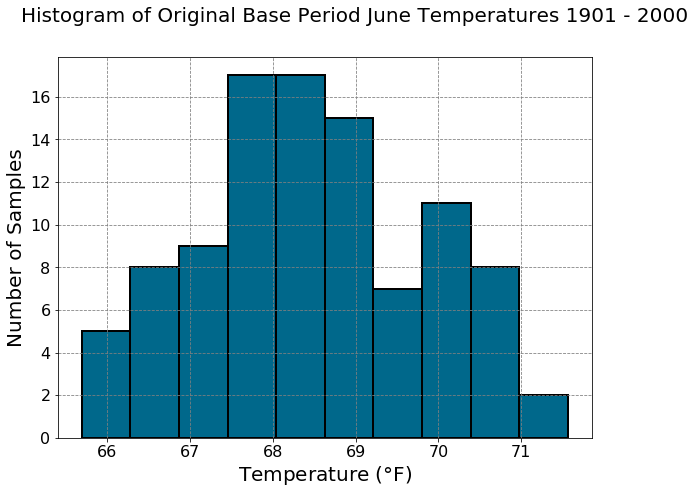

In [11]:
#what does the histogram of this look like? 

#set up the figure 
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Histogram of Original Base Period June Temperatures' + 
             ' {:%Y} - {:%Y}'.format(startDate, endDate), 
             fontsize=20)

gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(temperVarUS.loc[indMonth, :])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, density is the
#normalization factor, ie normalize to 1. 

#edgecolor and linewidth set up the bin edges
ax1.hist(temperVarUS.loc[indMonth, 'Value'], bins = int(numBins),
          facecolor = '#00688b', edgecolor="k", linewidth = 2.0, )

#set up grid
plt.grid(color='gray', linestyle='dashed')

#labels
plt.xlabel('Temperature ($\degree$F)', fontsize = 20)
plt.ylabel('Number of Samples', fontsize = 20)
#large ticks
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16); #make the yaxis labels larger, surpress print output


This is the histogram of just June temperatures within the base period - **does this look like a normal distribution? Check the numbers as well below.**


In [12]:
print("Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(temperVarUS.loc[indMonth, 'Value']), 
        kurtosis(temperVarUS.loc[indMonth, 'Value'], fisher = False), 
        np.std(temperVarUS.loc[indMonth, 'Value'], ddof = 1), 
        np.mean(temperVarUS.loc[indMonth, 'Value'])))


Skew: 0.1, Kurtosis: 2.4, Standard Dev: 1.4, Mean: 68.5




-

-

-

-

-






It still looks like we have a small skew though - this is likely due to our wide range of base time period - what about narrowing our base period?

### Adjusted Base Period 1941 - 1981

The number of bins for the histogram is: 7.0
Skew: 0.0, Kurtosis: 2.8, Standard Dev: 1.1, Mean: 68.4


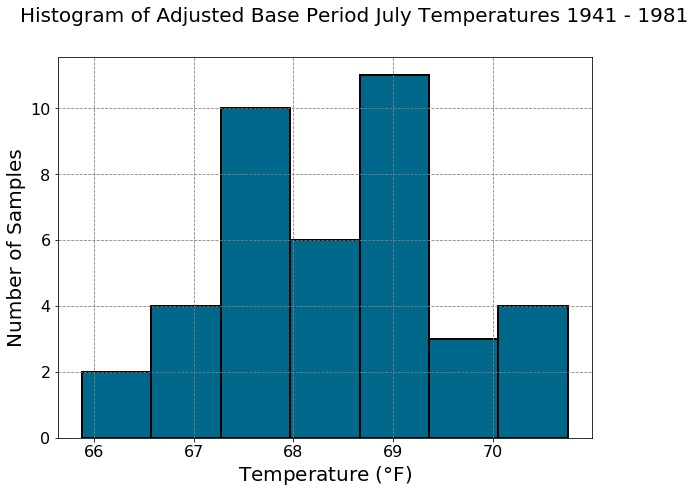

In [13]:
#set up date indexing 
startDate = dt.datetime(1941, 1, 1)
endDate   = dt.datetime(1981, 1, 1)


#looking at June
indMonth = ((temperVarUS.index >= startDate) & (temperVarUS.index <= endDate) & 
            (temperVarUS.index.month == 6))
#set up the figure 
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Histogram of Adjusted Base Period July Temperatures' + 
             ' {:%Y} - {:%Y}'.format(startDate, endDate), 
             fontsize=20)

gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(temperVarUS.loc[indMonth, :])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, density is the
#normalization factor, ie normalize to 1. 

#edgecolor and linewidth set up the bin edges
ax1.hist(temperVarUS.loc[indMonth, 'Value'], bins = int(numBins),
          facecolor = '#00688b', edgecolor="k", linewidth = 2.0)

#set up grid
plt.grid(color='gray', linestyle='dashed')

#labels
plt.xlabel('Temperature ($\degree$F)', fontsize = 20)
plt.ylabel('Number of Samples', fontsize = 20)
#large ticks
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger

print("Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(temperVarUS.loc[indMonth, 'Value']), 
        kurtosis(temperVarUS.loc[indMonth, 'Value'], fisher = False), 
        np.std(temperVarUS.loc[indMonth, 'Value'], ddof = 1), 
        np.mean(temperVarUS.loc[indMonth, 'Value'])))

**Question for you - Has the skew/kurtosis improved? What do the skew and kurtosis NOT tell us?**

-

-

-

-

## *Part 2 - Adjusting to New Base Period*

As we already saw we need to treat each month differently. If we want to calculate our new anomalies then we need to treat each month differently. They are coming from different normal distributions.

We would like to calculate BOTH the anomalies (difference from the mean) given the new normal base period AND t-Values or the standard deviation normalized differences.


$$ a_{values} = x - \bar{x}$$


$$ t_{values} = \frac{x - \bar{x}}{\sigma}$$

In [14]:
#set up variables for new normalization

startDate = dt.datetime(1941, 1, 1)
endDate   = dt.datetime(1981, 1, 1)

monthsArr = np.arange(1, 13)

temperVarUS['T_Values'] = np.nan
temperVarUS['Adjust_Anoms'] = np.nan


### Part 2. A. Calculating New T-Values and Anomalies

In [15]:
for month in monthsArr:
    #loop through months
    
    #set up index
    indDate = ((temperVarUS.index >= startDate) & (temperVarUS.index < endDate) &  
           (temperVarUS.index.month == month))
    print("\nRunning for Month: {}".format(month))
    
    #and set the values for standard deviation and averages
    stdDev = temperVarUS.loc[indDate, 'Value'].std()
    avrg   = temperVarUS.loc[indDate, 'Value'].mean()
    
    #print to make sure nothing is completly off with based distributions
    #for each month
    print("Skew: {:.1f}, Kurtosis: {:.1f}".format(
        skew(temperVarUS.loc[indDate, 'Value']), 
        kurtosis(temperVarUS.loc[indDate, 'Value'], fisher = False)))
    
    #set up adjusted anomalies
    indMonth = (temperVarUS.index.month == month)
    adjustedAnoms =  ((temperVarUS.loc[indMonth, 'Value'] - avrg))
          
    #while we are at it - how about we also calculate the normalized value, 
    # or the t / z value.
    tVals =  ((temperVarUS.loc[indMonth, 'Value'] - avrg) / stdDev)
    
    temperVarUS.loc[indMonth, 'T_Values'] = tVals
    temperVarUS.loc[indMonth, 'Adjust_Anoms'] = adjustedAnoms
    


Running for Month: 1
Skew: -0.6, Kurtosis: 3.9

Running for Month: 2
Skew: 0.5, Kurtosis: 3.8

Running for Month: 3
Skew: 0.2, Kurtosis: 2.2

Running for Month: 4
Skew: -0.1, Kurtosis: 2.8

Running for Month: 5
Skew: -0.0, Kurtosis: 2.1

Running for Month: 6
Skew: 0.0, Kurtosis: 2.8

Running for Month: 7
Skew: -0.0, Kurtosis: 3.1

Running for Month: 8
Skew: 0.1, Kurtosis: 2.6

Running for Month: 9
Skew: -0.3, Kurtosis: 2.6

Running for Month: 10
Skew: 0.4, Kurtosis: 4.1

Running for Month: 11
Skew: -0.3, Kurtosis: 2.5

Running for Month: 12
Skew: -0.2, Kurtosis: 2.6


###  Part 2. B. Replotting Base Period

Now that we have the adjusted anomalies what does the base period look like for the summer months? Can we plot all the months together now?


The number of bins for the histogram is: 15.0
Skew: -0.1, Kurtosis: 2.7, Standard Dev: 1.1, Mean: -0.0


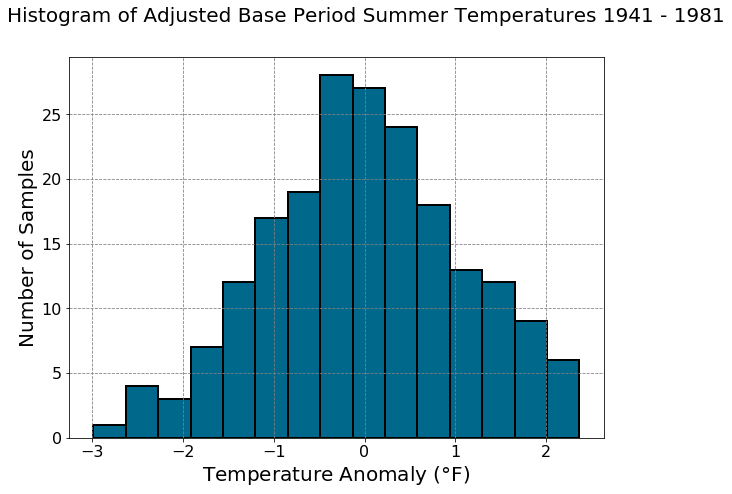

In [16]:
#set up date indexing 
startDate = dt.datetime(1941, 1, 1)
endDate   = dt.datetime(1981, 1, 1)

indSummer = ((temperVarUS.index >= startDate) & (temperVarUS.index <= endDate) & 
             (temperVarUS.index.month >= 5) &   (temperVarUS.index.month <= 9))

#set up the figure 
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Histogram of Adjusted Base Period Summer Temperatures' + 
             ' {:%Y} - {:%Y}'.format(startDate, endDate), 
             fontsize=20)

gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(temperVarUS.loc[indSummer, :])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, density is the
#normalization factor, ie normalize to 1. 

#edgecolor and linewidth set up the bin edges
ax1.hist(temperVarUS.loc[indSummer, 'Adjust_Anoms'], bins = int(numBins),
         facecolor = '#00688b', edgecolor="k", linewidth = 2.0)

#set up grid
plt.grid(color='gray', linestyle='dashed')

#labels
plt.xlabel('Temperature Anomaly ($\degree$F)', fontsize = 20)
plt.ylabel('Number of Samples', fontsize = 20)
#large ticks
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger

print("Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(temperVarUS.loc[indSummer, 'Adjust_Anoms']), 
        kurtosis(temperVarUS.loc[indSummer, 'Adjust_Anoms'], fisher = False), 
        np.std(temperVarUS.loc[indSummer, 'Adjust_Anoms'], ddof = 1), 
        np.mean(temperVarUS.loc[indSummer, 'Adjust_Anoms'])))

**Question for you! Do we think plotting it with the t-values on the x-axis will change anything?**


-


-


-


-


-



### Part 2. C. Plotting in Normalized Standard Deviation (t-values)

The number of bins for the histogram is: 15.0
Skew: -0.0, Kurtosis: 2.6, Standard Dev: 1.0, Mean: -0.0


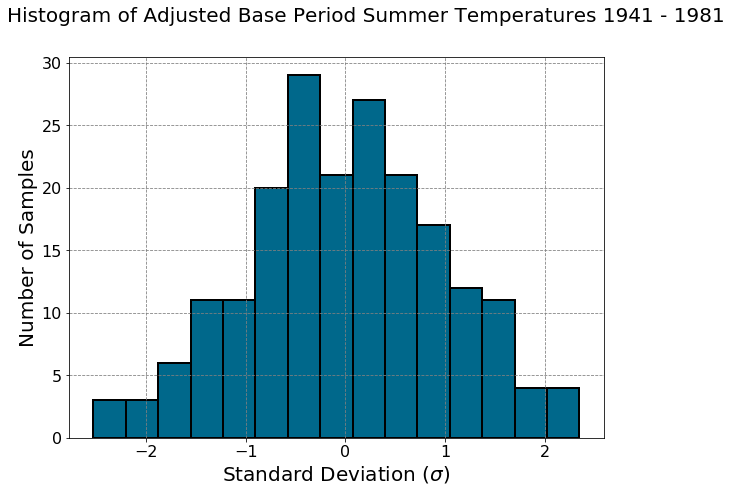

In [17]:

#the main change in this plotting block is the quantity being plotted - 

#set up the figure 
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Histogram of Adjusted Base Period Summer Temperatures' + 
             ' {:%Y} - {:%Y}'.format(startDate, endDate), 
             fontsize=20)

gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(temperVarUS.loc[indSummer, :])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, density is the
#normalization factor, ie normalize to 1. 

#edgecolor and linewidth set up the bin edges
ax1.hist(temperVarUS.loc[indSummer, 'T_Values'], bins = int(numBins),
         facecolor = '#00688b', edgecolor="k", linewidth = 2.0)

#set up grid
plt.grid(color='gray', linestyle='dashed')

#labels
plt.xlabel('Standard Deviation ($\sigma$)', fontsize = 20)
plt.ylabel('Number of Samples', fontsize = 20)
#large ticks
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger

print("Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(temperVarUS.loc[indSummer, 'T_Values']), 
        kurtosis(temperVarUS.loc[indSummer, 'T_Values'], fisher = False), 
        np.std(temperVarUS.loc[indSummer, 'T_Values'], ddof = 1), 
        np.mean(temperVarUS.loc[indSummer, 'T_Values'])))

Did anything change from the previous plot? Why do you think so?

-

-

-

-



### Part 2. D. Plotting in Normalized Standard Deviation (t-values) with Normalization

The number of bins for the histogram is: 15.0
Skew: -0.0, Kurtosis: 2.6, Standard Dev: 1.0, Mean: -0.0


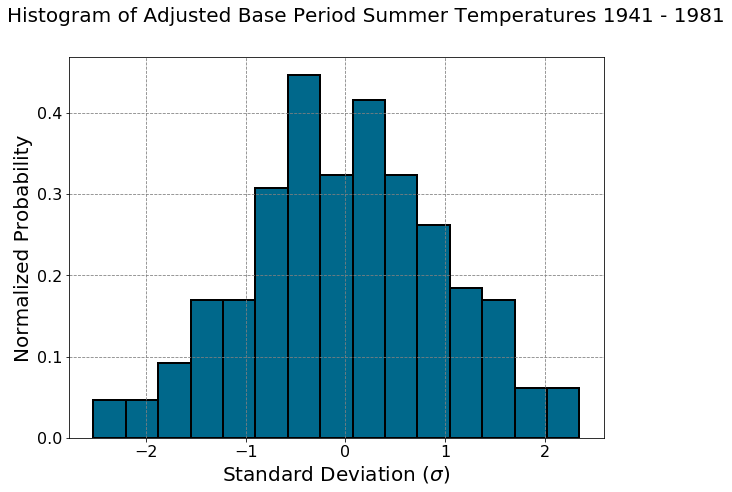

In [18]:
#the main change in this plotting block is the quantity being plotted - 

#set up the figure 
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Histogram of Adjusted Base Period Summer Temperatures' + 
             ' {:%Y} - {:%Y}'.format(startDate, endDate), 
             fontsize=20)

gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(temperVarUS.loc[indSummer, :])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, density is the
#normalization factor, ie normalize to 1. 

#edgecolor and linewidth set up the bin edges

####-------------------NEW WE ADDED IN DENSITY 1 for normalization
ax1.hist(temperVarUS.loc[indSummer, 'T_Values'], bins = int(numBins),
         density = 1, facecolor = '#00688b', edgecolor="k", linewidth = 2.0)
#####------------------------------------

#set up grid
plt.grid(color='gray', linestyle='dashed')

#labels
plt.xlabel('Standard Deviation ($\sigma$)', fontsize = 20)
plt.ylabel('Normalized Probability', fontsize = 20)
#large ticks
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger

print("Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(temperVarUS.loc[indSummer, 'T_Values']), 
        kurtosis(temperVarUS.loc[indSummer, 'T_Values'], fisher = False), 
        np.std(temperVarUS.loc[indSummer, 'T_Values'], ddof = 1), 
        np.mean(temperVarUS.loc[indSummer, 'T_Values'])))

## *Part 3 - Adding Normal Distribution Boundaries*



This whole time we've been discussing this like a normal distribution - what if we draw a 
normal distribution on this? 

WARNING - This is not quite line fitting, instead this is assuming that given the standard deviation
and mean of this distrbution what is the normal distribution?

We can use the norm.pdf() syntax here from scipy.stats that we imported at the beginning of the lab. 

In [19]:
#making a normal distribution line - we can use the norm.pdf() command

help(norm.pdf)

Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(x, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Probability density function at x of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    pdf : ndarray
        Probability density function evaluated at x



The number of bins for the histogram is: 15.0
Skew: -0.0, Kurtosis: 2.6, Standard Dev: 1.0, Mean: -0.0


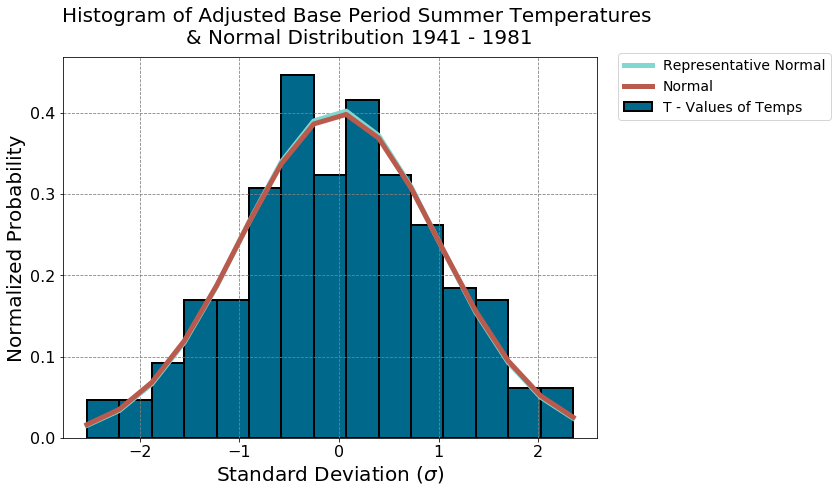

In [20]:
#set up the figure 
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Histogram of Adjusted Base Period Summer Temperatures \n' + 
             '& Normal Distribution' + 
             ' {:%Y} - {:%Y}'.format(startDate, endDate), 
             fontsize=20)

gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(temperVarUS.loc[indSummer, :])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, density is the
#normalization factor, ie normalize to 1. 


######________START CHANGE

#edgecolor and linewidth set up the bin edges
n, bins, patches = ax1.hist(temperVarUS.loc[indSummer, 'T_Values'], bins = int(numBins),
         density = 1, facecolor = '#00688b', edgecolor="k", linewidth = 2.0, 
                            label = 'T - Values of Temps')

#plot of adjusted normal - command is x values, then mean, then stdDev.
yValues = norm.pdf(bins, np.mean(temperVarUS.loc[indSummer, 'T_Values']), 
                          np.std(temperVarUS.loc[indSummer, 'T_Values'], ddof = 1))
         
ax1.plot(bins, yValues, color = '#81d8d0', linewidth = 5.0, label = 'Representative Normal')

#of a totally normal distribution?
ax1.plot(bins, norm.pdf(bins, 0, 1), color = '#ba5a4c', linewidth = 5.0, 
         label = 'Normal')

######________END CHANGES


#set up grid
plt.grid(color='gray', linestyle='dashed')

#labels
plt.xlabel('Standard Deviation ($\sigma$)', fontsize = 20)
plt.ylabel('Normalized Probability', fontsize = 20)
#large ticks
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger

print("Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(temperVarUS.loc[indSummer, 'T_Values']), 
        kurtosis(temperVarUS.loc[indSummer, 'T_Values'], fisher = False), 
        np.std(temperVarUS.loc[indSummer, 'T_Values'], ddof = 1), 
        np.mean(temperVarUS.loc[indSummer, 'T_Values'])))

ax1.legend(bbox_to_anchor = (1.45, 1.03), prop={'size':14});#surpress output with ;

**Question for you - Does this chart answer how recent decades have compared???**


## *Part 3: Annotating Plots & Time Series Normal Distributions*

In this part we will plot out how changes in the distribution have progressed in recent years for the summer time temperatures of the lower 48 states.

We just found a good normalization period that we wish to use - now let's take a look at more recent decades normalized to this period. 



The number of bins for the histogram is: 15.0

 Between 1985 - 2000 
 Skew: 0.2, Kurtosis: 3.0, Standard Dev: 1.2, Mean: 0.3


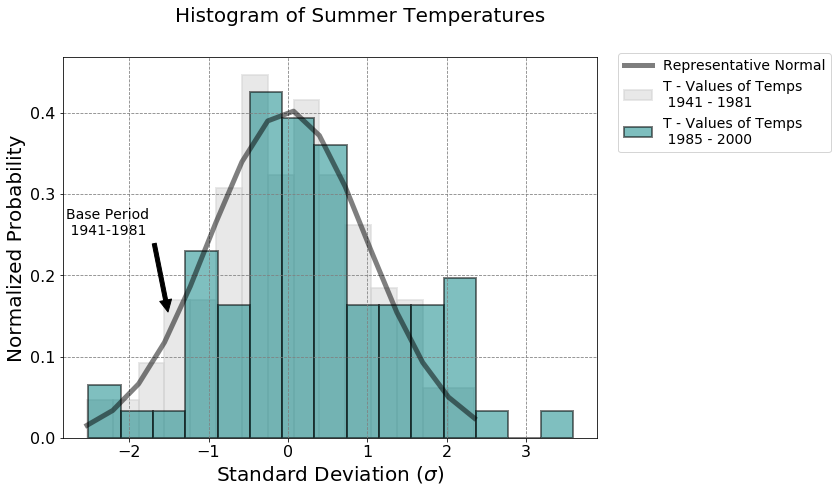

In [21]:
### start plotting figure - 

#set up the figure 
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Histogram of Summer Temperatures', fontsize=20)

gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(temperVarUS.loc[indSummer, :])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, density is the
#normalization factor, ie normalize to 1. 


######________START CHANGE

#edgecolor and linewidth set up the bin edges
n, bins, patches = ax1.hist(temperVarUS.loc[indSummer, 'T_Values'], bins = int(numBins),
         density = 1, facecolor = '#d3d3d3', edgecolor="#d3d3d3", 
         alpha = 0.5, linewidth = 2.0, 
         label = 'T - Values of Temps \n {:%Y} - {:%Y}'.format(startDate, endDate))

#plot of adjusted normal - command is x valyes, then mean, then stdDev.
yValues = norm.pdf(bins, np.mean(temperVarUS.loc[indSummer, 'T_Values']), 
                        np.std(temperVarUS.loc[indSummer, 'T_Values'], ddof = 1))

ax1.plot(bins, yValues, color = 'k', alpha = 0.5, 
                         linewidth = 5.0, label = 'Representative Normal')


#find the 90s time period
startDateNineties = dt.datetime(1985, 1, 1)
endDateNineties   = dt.datetime(2000, 1, 1)


indNineties = ((temperVarUS.index >= startDateNineties) & 
               (temperVarUS.index <= endDateNineties) & 
               (temperVarUS.index.month >= 5) &
               (temperVarUS.index.month <= 9))


#plot out the 90s distrbution
ax1.hist(temperVarUS.loc[indNineties, 'T_Values'], bins = int(numBins),
         density = 1, facecolor = '#008080', edgecolor="k", 
         alpha = 0.5, linewidth = 2.0, 
         label = 'T - Values of Temps \n {:%Y} - {:%Y}'.format(
         startDateNineties, endDateNineties))




#set up grid
plt.grid(color='gray', linestyle='dashed')

#labels
plt.xlabel('Standard Deviation ($\sigma$)', fontsize = 20)
plt.ylabel('Normalized Probability', fontsize = 20)
#large ticks
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger


#plot out statistics of the new dist.
print("\n Between {:%Y} - {:%Y} \n".format(startDateNineties, endDateNineties) + 
      " Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(temperVarUS.loc[indNineties, 'T_Values']), 
        kurtosis(temperVarUS.loc[indNineties, 'T_Values'], fisher = False), 
        np.std(temperVarUS.loc[indNineties, 'T_Values'], ddof = 1), 
        np.mean(temperVarUS.loc[indNineties, 'T_Values'])))


#annotates axis with text and arrow toward point - in coordinates 
ax1.annotate('Base Period \n {:%Y}-{:%Y}'.format(startDate, endDate), xy=(-1.5, 0.15), 
            xytext=(-2.8, 0.25),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 14)
######________END CHANGES
ax1.legend(bbox_to_anchor = (1.45, 1.03), prop={'size':14});

The number of bins for the histogram is: 15.0

 Between 2000 - 2017 
 Skew: -0.3, Kurtosis: 2.7, Standard Dev: 1.1, Mean: 1.2


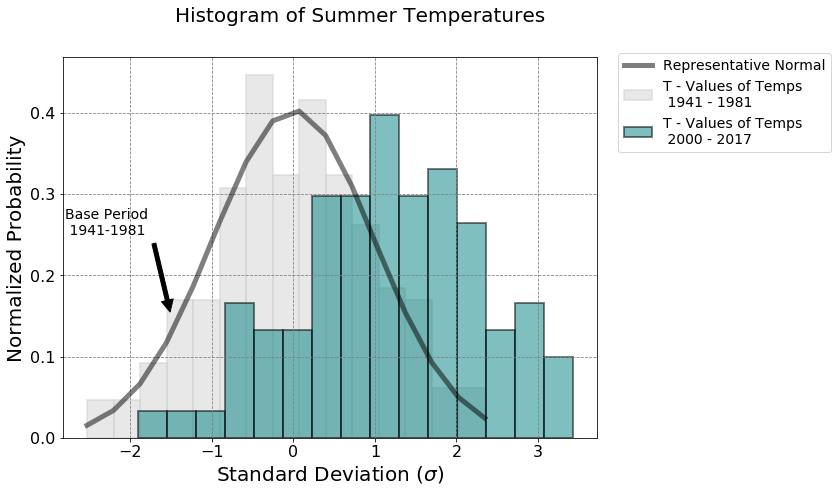

In [22]:
### Plotting Recent - 

### start plotting figure - 

#set up the figure 
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Histogram of Summer Temperatures', fontsize=20)

gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(temperVarUS.loc[indSummer, :])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, density is the
#normalization factor, ie normalize to 1. 


######________START CHANGE

#edgecolor and linewidth set up the bin edges
n, bins, patches = ax1.hist(temperVarUS.loc[indSummer, 'T_Values'], bins = int(numBins),
         density = 1, facecolor = '#d3d3d3', edgecolor="#d3d3d3", 
         alpha = 0.5, linewidth = 2.0, 
         label = 'T - Values of Temps \n {:%Y} - {:%Y}'.format(
         startDate, endDate))

yValues = norm.pdf(bins, np.mean(temperVarUS.loc[indSummer, 'T_Values']), 
                        np.std(temperVarUS.loc[indSummer, 'T_Values'], ddof = 1))
#plot of adjusted normal - command is x valyes, then mean, then stdDev.
ax1.plot(bins,  yValues, color = 'k', alpha = 0.5, 
                        linewidth = 5.0, label = 'Representative Normal')



#recent index
startDateRecent = dt.datetime(2000, 1, 1)
endDateRecent   = dt.datetime(2017, 1, 1)

indRecent= ((temperVarUS.index >= startDateRecent) & 
            (temperVarUS.index <= endDateRecent) & 
            (temperVarUS.index.month >= 5) &
            (temperVarUS.index.month <= 9))

#and plot 90s
ax1.hist(temperVarUS.loc[indRecent, 'T_Values'], bins = int(numBins),
         density = 1, facecolor = '#008080', edgecolor="k", 
         alpha = 0.5, linewidth = 2.0, 
         label = 'T - Values of Temps \n {:%Y} - {:%Y}'.format(
         startDateRecent, endDateRecent))




#set up grid
plt.grid(color='gray', linestyle='dashed')

#labels
plt.xlabel('Standard Deviation ($\sigma$)', fontsize = 20)
plt.ylabel('Normalized Probability', fontsize = 20)
#large ticks
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger


#plot out statistics of the new dist.
print("\n Between {:%Y} - {:%Y} \n".format(startDateRecent, endDateRecent) + 
      " Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(temperVarUS.loc[indRecent, 'T_Values']), 
        kurtosis(temperVarUS.loc[indRecent, 'T_Values'], fisher = False), 
        np.std(temperVarUS.loc[indRecent, 'T_Values'], ddof = 1), 
        np.mean(temperVarUS.loc[indRecent, 'T_Values'])))


#annotates axis with text and arrow toward point - in coordinates 
ax1.annotate('Base Period \n {:%Y}-{:%Y}'.format(startDate, endDate), xy=(-1.5, 0.15), 
            xytext=(-2.8, 0.25),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 14)
######________END CHANGES

ax1.legend(bbox_to_anchor = (1.45, 1.03), prop={'size':14});

**Question for you! How would you interpret this plot given what you know about standard deviation and normal distributions?**

-

-

-

-

-

-


## *Part 4 - Relevant Health Impacts - Evaluating Data*

Up to now we've been looking into temperature data - what about geolocated temperature data that has impacts on human health? According to the National Climate Assesment (2014) 

"Extreme heat events are the leading weather-related cause of death in the United States. Many cities, including St. Louis, Philadelphia, Chicago, and Cincinnati have suffered dramatic spikes in death rates during heat waves...deaths result from heat stroke and related conditions...Heat waves are also associated with increased hospital admissions for cardiovascular, kidney, and respiratory disorders."

https://nca2014.globalchange.gov/highlights/report-findings/human-health


In [23]:
#let's import our data from the Center for Disease Control on county level extreme heat
#days


#This data is from the CDC at https://ephtracking.cdc.gov/showClimateChangeLanding.action
#and represents the number of days exceding the 90% threshold of maximum temperature within
#the summer months between May - September. 

#A 0 in this database can EITHER mean no data, OR no recorded days.
healthImpactUS = pd.read_csv('./Data/CDC_Health_HeatIndex/data_161717.csv')


In [24]:
#while we can always look at the start or end of the data set - let's check out another method below...

healthImpactUS.head(n=6)

,stateFIPS,State,countyFIPS,County,Year,Value,Stability,Relative Threshold,Heat Metric
0,1,Alabama,1001,Autauga,1979,0,1,90th Percentile,Daily Maximum Temperature
1,1,Alabama,1001,Autauga,1980,16,1,90th Percentile,Daily Maximum Temperature
2,1,Alabama,1001,Autauga,1981,14,1,90th Percentile,Daily Maximum Temperature
3,1,Alabama,1001,Autauga,1982,0,1,90th Percentile,Daily Maximum Temperature
4,1,Alabama,1001,Autauga,1983,5,1,90th Percentile,Daily Maximum Temperature
5,1,Alabama,1001,Autauga,1984,0,1,90th Percentile,Daily Maximum Temperature


In [25]:
healthImpactUS.describe()


,stateFIPS,countyFIPS,Year,Value,Stability
count,108819.000000,108819.000000,108819.000000,108819.000000,108819.0
mean,30.575855,30679.309542,1996.000055,13.291190,1.0
std,14.964504,14983.940365,10.099372,13.837534,0.0
min,1.000000,1001.000000,1979.000000,0.000000,1.0
25%,19.000000,19045.000000,1987.000000,3.000000,1.0
50%,29.000000,29213.000000,1996.000000,9.000000,1.0
75%,46.000000,46009.000000,2005.000000,19.000000,1.0
max,56.000000,56045.000000,2013.000000,109.000000,1.0


**What does this tell us? - would you consider this a large dataset?**

### Part 4. A. Cleaning the Imported Data -  Replacing Suspect Zero Values

Let's go ahead and replace all the zeros with np.nan's for easier tracking. 

**WARNING: This means that we are automatically discounting any potential 0 days - keep this in mind the trade off is that we are no longer weighting years & counties with no data as realistic values.**

In [26]:
#replace all suspected 0 data with np.nans

healthImpactUS = healthImpactUS.replace(0, np.nan)

#note how the min changed?
healthImpactUS.describe()

,stateFIPS,countyFIPS,Year,Value,Stability
count,108819.000000,108819.000000,108819.000000,96155.000000,108819.0
mean,30.575855,30679.309542,1996.000055,15.041693,1.0
std,14.964504,14983.940365,10.099372,13.797287,0.0
min,1.000000,1001.000000,1979.000000,1.000000,1.0
25%,19.000000,19045.000000,1987.000000,5.000000,1.0
50%,29.000000,29213.000000,1996.000000,11.000000,1.0
75%,46.000000,46009.000000,2005.000000,21.000000,1.0
max,56.000000,56045.000000,2013.000000,109.000000,1.0


This data is rather tedious to use. This is due to the fact that it has the structure of a **multi-level index** - you can index with either or both state, year, and county. 

For example - if you wanted a time series of Washtenaw County in Michigan...

In [27]:
localIndex = (healthImpactUS['State']=='Michigan') & (healthImpactUS['County']=='Washtenaw')
print(healthImpactUS.loc[localIndex, ['State', 'County', 'Year', 'Value']])


          State     County  Year  Value
44695  Michigan  Washtenaw  1979    2.0
44696  Michigan  Washtenaw  1980   10.0
44697  Michigan  Washtenaw  1981    2.0
44698  Michigan  Washtenaw  1982    3.0
44699  Michigan  Washtenaw  1983   18.0
44700  Michigan  Washtenaw  1984    9.0
44701  Michigan  Washtenaw  1985    3.0
44702  Michigan  Washtenaw  1986    6.0
44703  Michigan  Washtenaw  1987   23.0
44704  Michigan  Washtenaw  1988   40.0
44705  Michigan  Washtenaw  1989    3.0
44706  Michigan  Washtenaw  1990    8.0
44707  Michigan  Washtenaw  1991   20.0
44708  Michigan  Washtenaw  1992    2.0
44709  Michigan  Washtenaw  1993    7.0
44710  Michigan  Washtenaw  1994   11.0
44711  Michigan  Washtenaw  1995   17.0
44712  Michigan  Washtenaw  1996    6.0
44713  Michigan  Washtenaw  1997    6.0
44714  Michigan  Washtenaw  1998   11.0
44715  Michigan  Washtenaw  1999   15.0
44716  Michigan  Washtenaw  2000    2.0
44717  Michigan  Washtenaw  2001   14.0
44718  Michigan  Washtenaw  2002   21.0


**Question for you! But what if you wanted all the states, *including* their counties summarized to an aggregate value by year of this table? Take a a minute and discuss with a person next to you.**

-

-

-

-

-

-

-

-

-

-

-

### Part 4. B. Groupby

You could work with the methods we had seen before, and set up a dictionary to loop through the values and set up a new object with this summary level data. I want to show you a faster and arguably easier way to achieve the same result. 

In [28]:
exampleMean = healthImpactUS.groupby(['Year'], as_index=False)['Value'].mean()

exampleSkew = healthImpactUS.groupby(['Year'], as_index=False)['Value'].skew()

#as index = False is a keyword argument (kwarg) that changes the output
#of the returned value (as index or as not)



Go ahead and look at the example values - what do you think this did? Are the skew values showing something like a normal distribution?

In [29]:
#type in commands here to evaluate the example values




-

-

-

-

-

Let's take the quantiles instead of the mean and standard deviation as this looks non-normal.

In [30]:
exampleBoxData = healthImpactUS.groupby(['Year'], 
                as_index=False)['Value'].quantile([0.25,0.5,0.75])


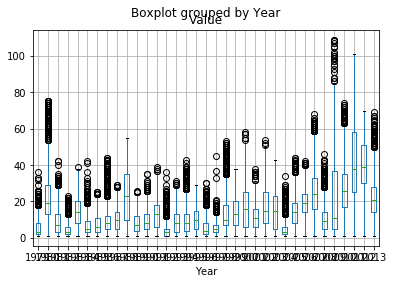

In [31]:
#SIDENOTE - like how I had you do DataFrame.hist() in your homework
#boxplot is another auto formatted plot that you can make quickly (exploratory) 
#to evaluate the trends of your data

healthImpactUS.boxplot(column='Value', by='Year')

## *Part 5 - Extreme Temperature Days - Box Plots*

I like plots to be pretty specific. So we will also learn the more "matplotlib-ish" way of plotting a series of box plots. The box plot command takes in a list of values and locations for box plots if you are interested in making mulitple box plots. Below we set this up and plot it.

### Part 5. A. Setting Up The Data

In [32]:
groups = healthImpactUS.groupby(['Year'], as_index=False)

#if you want to iterate over a groupby object
for name, group in groups:
    #notice how the groups in a groupby object are all mini-dataframes?
    #it has inherited this type
    print(name, group.columns, type(group))
    

1979 Index(['stateFIPS', 'State', 'countyFIPS', 'County', 'Year', 'Value',
       'Stability', 'Relative Threshold', 'Heat Metric'],
      dtype='object') <class 'pandas.core.frame.DataFrame'>
1980 Index(['stateFIPS', 'State', 'countyFIPS', 'County', 'Year', 'Value',
       'Stability', 'Relative Threshold', 'Heat Metric'],
      dtype='object') <class 'pandas.core.frame.DataFrame'>
1981 Index(['stateFIPS', 'State', 'countyFIPS', 'County', 'Year', 'Value',
       'Stability', 'Relative Threshold', 'Heat Metric'],
      dtype='object') <class 'pandas.core.frame.DataFrame'>
1982 Index(['stateFIPS', 'State', 'countyFIPS', 'County', 'Year', 'Value',
       'Stability', 'Relative Threshold', 'Heat Metric'],
      dtype='object') <class 'pandas.core.frame.DataFrame'>
1983 Index(['stateFIPS', 'State', 'countyFIPS', 'County', 'Year', 'Value',
       'Stability', 'Relative Threshold', 'Heat Metric'],
      dtype='object') <class 'pandas.core.frame.DataFrame'>
1984 Index(['stateFIPS', 'State', '

In [33]:
#we want these in a list - we can use list comprehension like so to do this
exampleList = [x**2 for x in range(10)]

print(exampleList)


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [34]:
boxPlotData = [group['Value'].values for name, group in groups]

#look familiar?
print(boxPlotData[0])
print(type(boxPlotData))
print(type(boxPlotData[0]))


[ nan  nan  nan ...,  17.  11.  13.]
<class 'list'>
<class 'numpy.ndarray'>


In [35]:
#the box plot command is pretty picky with nans - notice how we have quite a few in 
#there from replacing the poorly formatted data?

#here we've inserted a locator to identify where it is a nan value, and remove this
boxPlotData = [group.loc[~np.isnan(group['Value']), 
                         'Value'].values for name, group in groups]

#print the first group
print(boxPlotData[0])
print(type(boxPlotData))
print(type(boxPlotData[0]))



[  1.   1.   1. ...,  17.  11.  13.]
<class 'list'>
<class 'numpy.ndarray'>


### Part 5. B. Plotting

Now that we have our groups of data - let's make our plot. 


The number of bins for the histogram is: 15.0

 Between 2000 - 2017 
 Skew: -0.3, Kurtosis: 2.7, Standard Dev: 1.1, Mean: 1.2


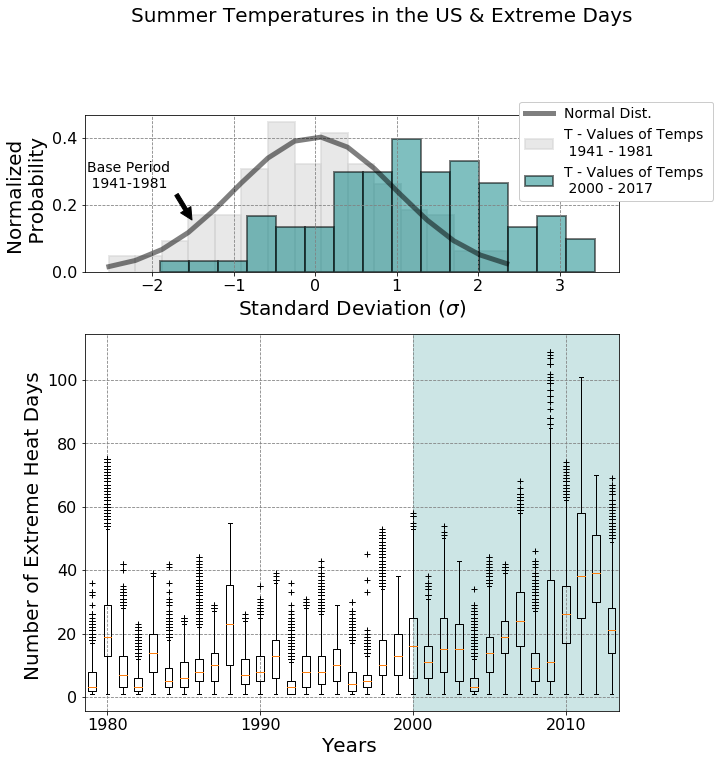

In [36]:
### Plotting Recent - 

### start plotting figure - 

#set up the figure 
fig = plt.figure(figsize=(11, 15))
fig.suptitle('Summer Temperatures in the US & Extreme Days', fontsize=20)

gs = plt.GridSpec(4, 1, hspace=0.4, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1:3,:])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(temperVarUS.loc[indSummer, :])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, density is the
#normalization factor, ie normalize to 1. 



#edgecolor and linewidth set up the bin edges
n, bins, patches = ax1.hist(temperVarUS.loc[indSummer, 'T_Values'], bins = int(numBins),
         density = 1, facecolor = '#d3d3d3', edgecolor="#d3d3d3", 
         alpha = 0.5, linewidth = 2.0, 
         label = 'T - Values of Temps \n {:%Y} - {:%Y}'.format(
         startDate, endDate))

#plot of adjusted normal - command is x valyes, then mean, then stdDev.
yYalues = norm.pdf(bins, np.mean(temperVarUS.loc[indSummer, 'T_Values']), 
                        np.std(temperVarUS.loc[indSummer, 'T_Values'], ddof = 1))

ax1.plot(bins, yYalues, color = 'k', alpha = 0.5, 
                         linewidth = 5.0, label = 'Normal Dist.')


startDateRecent = dt.datetime(2000, 1, 1)
endDateRecent   = dt.datetime(2017, 1, 1)

indRecent= ((temperVarUS.index >= startDateRecent) & 
             (temperVarUS.index <= endDateRecent) & 
             (temperVarUS.index.month >= 5) &
             (temperVarUS.index.month <= 9))


ax1.hist(temperVarUS.loc[indRecent, 'T_Values'], int(numBins),
         density = 1, facecolor = '#008080', edgecolor="k", 
         alpha = 0.5, linewidth = 2.0, 
         label = 'T - Values of Temps \n {:%Y} - {:%Y}'.format(
         startDateRecent, endDateRecent))



#set up grid
ax1.grid(color='gray', linestyle='dashed')

#labels
ax1.set_xlabel('Standard Deviation ($\sigma$)', fontsize = 20)
ax1.set_ylabel('Normalized \n Probability', fontsize = 20)
#large ticks

ax1.tick_params(labelsize = 16)


#plot out statistics of the new dist.
print("\n Between {:%Y} - {:%Y} \n".format(startDateRecent, endDateRecent) + 
      " Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(temperVarUS.loc[indRecent, 'T_Values']), 
        kurtosis(temperVarUS.loc[indRecent, 'T_Values'], fisher = False), 
        np.std(temperVarUS.loc[indRecent, 'T_Values'], ddof = 1), 
        np.mean(temperVarUS.loc[indRecent, 'T_Values'])))


#annotates axis with text and arrow toward point - in coordinates 
ax1.annotate('Base Period \n {:%Y}-{:%Y}'.format(startDate, endDate), xy=(-1.5, 0.15), 
            xytext=(-2.8, 0.25),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 14)


leg = ax1.legend(bbox_to_anchor = (0.8, 1.13), prop={'size':14})
leg.get_frame().set_alpha(1.0)

#-------------------------------------------

#box plot is pretty picky with data formats

####START BOX PLOT
pos = healthImpactUS.Year.unique()


#python chooses the shikerse to default to the point of Q3 (upper edge of box)
#+ whisker lenghth * InterQuartile Range - you can set this to be
#something other than 1.5 which is default with whis = 1.5
ax2.boxplot(boxPlotData, sym='k+', positions = pos)

#shade in the region that corresponds with the temp data
ax2.axvspan(startDateRecent.year, endDateRecent.year, 
            alpha = 0.2, color ='#008080')

ax2.grid(color='gray', linestyle='dashed')
ax2.tick_params(labelsize = 16)

ax2.set_ylabel('Number of Extreme Heat Days ', fontsize = 20)
ax2.set_xlabel('Years ', fontsize = 20)

#the boxplot has odd behaivor around xticks - this is another
#way outside of mulitple locator to handle tick marks
plt.xticks([1980, 1990, 2000, 2010], ['1980', '1990', '2000', '2010']);


There are ways to keep iteraing on this to make the fliers change as well as change the scale lengths of the IQR etc. Below the summary block there is an additional plot to demonstrate some different options. With boxplots especially you will want to refer to the help documentation to determine how to make your own. 

This is a very basic box plot, what can you see as the impacts of temperature trends on the county level data of extreme heat days? This sets up background information for heat related impacts on human populations - your homework will look directly at human level data from the CDC to analyze the potential impacts. What are some issues to keep in mind when analyzing human population datasets?

# SUMMARY

From this lab you have learned the basics of dealing with geolocated data of similar format to population level data. Additionally you have learned about boxplots, groupby, and normal distributions.

Homework: 
- Please complete lab report 5 located in the file folder - due in 1.5 weeks on the 22nd - Lab 4 report is due on this Friday the 15th. Make sure you put all the relevant data files etc that your notebook needs to run in the zipped up folder with your own work. 

This homework should take no more than 5 hours but do start early in case you run into logistical issues! 

## EXTRA - Slightly Adjusted Box Plot

The number of bins for the histogram is: 15.0

 Between 2000 - 2017 
 Skew: -0.3, Kurtosis: 2.7, Standard Dev: 1.1, Mean: 1.2


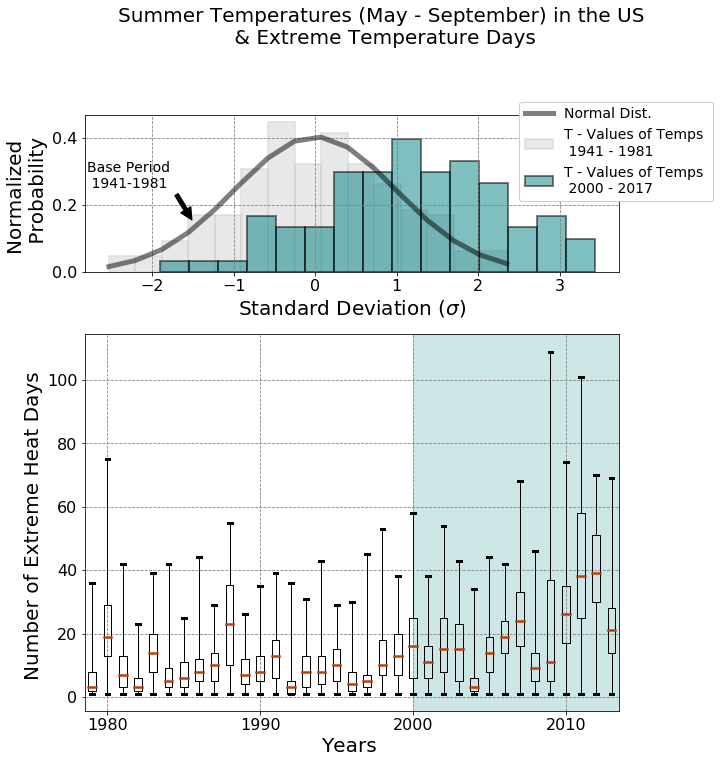

In [37]:
#set up the figure 
fig = plt.figure(figsize=(11, 15))
fig.suptitle('Summer Temperatures (May - September) in the US' + 
             '\n & Extreme Temperature Days', fontsize=20)

gs = plt.GridSpec(4, 1, hspace=0.4, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1:3,:])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(temperVarUS.loc[indSummer, :])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, normed is the
#normalization factor, ie normalize to 1. 



#edgecolor and linewidth set up the bin edges
n, bins, patches = ax1.hist(temperVarUS.loc[indSummer, 'T_Values'], bins = int(numBins),
         density = 1, facecolor = '#d3d3d3', edgecolor="#d3d3d3", 
         alpha = 0.5, linewidth = 2.0, 
         label = 'T - Values of Temps \n {:%Y} - {:%Y}'.format(
         startDate, endDate))

#plot of adjusted normal - command is x valyes, then mean, then stdDev.

yValues =  norm.pdf(bins, np.mean(temperVarUS.loc[indSummer, 'T_Values']), 
                        np.std(temperVarUS.loc[indSummer, 'T_Values'], ddof = 1))

ax1.plot(bins, yValues, color = 'k', alpha = 0.5, 
                         linewidth = 5.0, label = 'Normal Dist.')


ax1.hist(temperVarUS.loc[indRecent, 'T_Values'], bins = int(numBins),
         density = 1, facecolor = '#008080', edgecolor="k", 
         alpha = 0.5, linewidth = 2.0, 
         label = 'T - Values of Temps \n {:%Y} - {:%Y}'.format(
         startDateRecent, endDateRecent))



#set up grid
ax1.grid(color='gray', linestyle='dashed')

#labels
ax1.set_xlabel('Standard Deviation ($\sigma$)', fontsize = 20)
ax1.set_ylabel('Normalized \n Probability', fontsize = 20)
#large ticks

ax1.tick_params(labelsize = 16)


#plot out statistics of the new dist.
print("\n Between {:%Y} - {:%Y} \n".format(startDateRecent, endDateRecent) + 
      " Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(temperVarUS.loc[indRecent, 'T_Values']), 
        kurtosis(temperVarUS.loc[indRecent, 'T_Values'], fisher = False), 
        np.std(temperVarUS.loc[indRecent, 'T_Values'], ddof = 1), 
        np.mean(temperVarUS.loc[indRecent, 'T_Values'])))


#annotates axis with text and arrow toward point - in coordinates 
ax1.annotate('Base Period \n {:%Y}-{:%Y}'.format(startDate, endDate), xy=(-1.5, 0.15), 
            xytext=(-2.8, 0.25),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 14)


leg = ax1.legend(bbox_to_anchor = (0.8, 1.13), prop={'size':14})
leg.get_frame().set_alpha(1.0)

#-------------------------------------------

#box plot is pretty picky with data formats

####START BOX PLOT
pos = healthImpactUS.Year.unique()


#python chooses the shikerse to default to the point of Q3 (upper edge of box)
#+ whisker lenghth * InterQuartile Range - you can set this to be
#something other than 1.5 which is default with whis = 1.5

#set whisker to the FULL range of data, not with outliers - 

#set up medians
mp = dict(linewidth = 2.5, color = '#b8400c')
cp = dict(linewidth = 3.0)

ax2.boxplot(boxPlotData, positions = pos, whis = 'range', 
            medianprops = mp, capprops = cp)

#shade in the region that corresponds with the temp data
ax2.axvspan(startDateRecent.year, endDateRecent.year, 
            alpha = 0.2, color ='#008080')

ax2.grid(color='gray', linestyle='dashed')
ax2.tick_params(labelsize = 16)

ax2.set_ylabel('Number of Extreme Heat Days ', fontsize = 20)
ax2.set_xlabel('Years ', fontsize = 20)

#the boxplot has odd behaivor around xticks - this is another
#way outside of mulitple locator to handle tick marks
plt.xticks([1980, 1990, 2000, 2010], ['1980', '1990', '2000', '2010'])


plt.savefig('./Figures/SummerTemps.png')